<font color='red'><b>Brief note for students</b></font>

Better Learning

In this notebook, you will discover techniques to improve the **optimization problem** of adapting neural network model weights to learn a training dataset. After reading this notebook, you will know:

1. How the challenge of training a neural network involves solving a non-convex optimization problem with no guarantees of convergence on a viable solution.
2. How the model's capacity controls the scope of functions that can be learned and how the number of nodes and layers control capacity.
3. How the batch size controls the precision of the estimate of error used to update model weights and, in turn, the stability and speed of convergence.
4. How loss functions control the nature of the function approximation problem that is being solved.
5. How the learning rate controls the amount that model parameters are updated and in
turn the stability and speed of convergence.


# 1 Introduction

Deep learning neural networks learn a mapping function from inputs to outputs. This is achieved by updating the network's weights in response to the errors the model makes on the training dataset. Updates are made to reduce this error until either a good enough model continually is found or the learning process gets stuck and stops. The process of training neural networks is the most challenging part of using the technique in general. It is by far the most time-consuming, both in terms of the effort required to configure the process and the computational complexity required to execute it.


Training a deep learning neural network model using stochastic gradient descent with backpropagation involves choosing several components and hyperparameters, they are:

- **Network Topology**: The number of nodes (or equivalent) in the hidden layers and the number of hidden layers in the network
- **Loss Function**: The function used to measure the performance of a model with a specific set of weights on examples from the training dataset
- **Weight Initialization**: The procedure by which the initial small random values are assigned to model weights at the beginning of the training process.
- **Batch Size**: The number of examples used to estimate the error gradient before updating the model parameters
- **Learning Rate**: The amount that each model parameter is updated per iteration of the learning algorithm
- **Epochs**: The number of complete passes through the training dataset before the training process is terminated.
- **Data Preparation**: The schemes used to prepare the data prior to modeling in order to ensure that it is suitable for the problem and for developing a stable model

<font color='red'>Highlight:</font>

- Neural networks learn a mapping function from inputs to outputs that can be summarized as solving the problem of function approximation. 
- Unlike other machine learning algorithms, a neural network's parameters must be found by solving a non-convex optimization problem with many reasonable solutions and many misleadingly right solutions.
- The stochastic gradient descent algorithm is used to solve the optimization problem where model parameters are updated each iteration using the backpropagation algorithm.

# 2 Configure capacity with nodes and layers

A deep learning neural network model's capacity controls the scope of the mapping functions that it can learn. A model with too little capacity cannot learn the training dataset meaning it will underfit. In contrast, a model with too much capacity may memorize the training dataset, meaning it will become overfit or get stuck or lost during the optimization process. **A neural network model's capacity is defined by configuring the number of nodes and the number of layers.**

## 2.1 - The problem

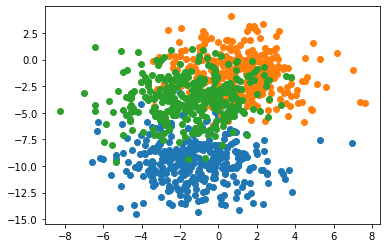

In [1]:
# 
# Multiclass classification problem
# 
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show plot
plt.show()

## 2.2 Change model capacity with nodes

In [2]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
def create_dataset():
  """ prepare multi-class classification dataset 
  generating a 2d classification dataset

  Args:

  Return:
    dataset split into train_x, train_y, test_x, test_y
  """
	# create raw points
  x, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	
  # one hot encode output variable
  y = to_categorical(y)
 
  # split into train and test
  n_train = 500
  train_x, test_x = x[:n_train, :], x[n_train:, :]
  train_y, test_y = y[:n_train], y[n_train:]
	
  return train_x, train_y, test_x, test_y

In [4]:
def evaluate_model(n_nodes, train_x, train_y, test_x, test_y):
  """ fit model with given number of nodes
  Args:
    n_nodes: number of nodes
    train_x: training features
    train_y: training target
    test_x: test features
    test_y: test target

  Return:
    test set accuracy generating a 2d classification dataset
  """
  
  # configure the model based on the data
  n_input, n_classes = train_x.shape[1], test_y.shape[1]
	
  # define model
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_classes, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # fit model on train set
  history = model.fit(train_x, train_y, epochs=100, verbose=0)

  # evaluate model on test set
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  return history, test_acc


nodes=1: 0.138
nodes=2: 0.392
nodes=3: 0.650
nodes=4: 0.940
nodes=5: 0.930
nodes=6: 1.000
nodes=7: 1.000


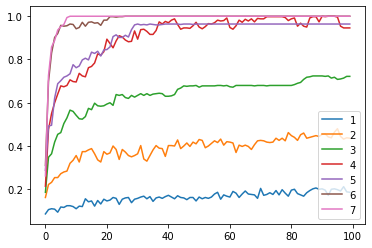

In [9]:
# prepare dataset
train_x, train_y, test_x, test_y = create_dataset()

# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]

for n_nodes in num_nodes:
	# evaluate model with a given number of nodes
	history, result = evaluate_model(n_nodes, train_x, train_y, test_x, test_y)
 
	# summarize final test set accuracy
	print('nodes=%d: %.3f' % (n_nodes, result))
 
	# plot learning curve
	plt.plot(history.history['accuracy'], label=str(n_nodes))
# show the plot
plt.legend()
plt.show()

As the number of nodes is increased, the capacity of the model to learn the problem is improved. This results in a progressive lowering of the generalization error of the model on the test dataset until 7 node when the model learns the problem perfectly.

## 2.3 Change Model Capacity With Layers

We can perform a similar analysis and evaluate how the number of layers impacts the model's ability to learn the mapping function. Increasing the number of layers can often significantly increase the model's capacity, acting like a computational and learning shortcut to modeling a problem. For example, a model with one hidden layer of 10 nodes is not equivalent to a model with two hidden layers with ve nodes each. The latter has a much greater capacity. The danger is that a model with more capacity than is required is likely to overfit the training data, and as with a model that has too many nodes, a model with too many layers will likely be unable to learn the training dataset, getting lost or stuck during the optimization process. 

First, we can update the evaluate_model() function to fit an MLP model with a given number of layers. We know that an MLP with about seven or more nodes fit for 100 epochs will learn the problem perfectly from the previous section. Therefore, we will use ten nodes in each layer to ensure the model has enough capacity in just one layer to learn the problem. The updated function is listed below, taking the number of layers and dataset as arguments and returning the model's training history and test accuracy.

In [5]:
def evaluate_model2(n_layers, train_x, train_y, test_x, test_y):
  """ fit model with given number of nodes
  Args:
    n_layers: number of layers
    train_x: training features
    train_y: training target
    test_x: test features
    test_y: test target

  Return:
    test set accuracy generating a 2d classification dataset
  """
  
  # configure the model based on the data
  n_input, n_classes = train_x.shape[1], test_y.shape[1]

  # define model
  model = Sequential()
  model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))

  for _ in range(1, n_layers):
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))

  model.add(Dense(n_classes, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # fit model
  history = model.fit(train_x, train_y, epochs=100, verbose=0)

  # evaluate model on test set
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  return history, test_acc

layers=1: 1.000
layers=2: 1.000
layers=3: 1.000
layers=4: 0.898
layers=5: 0.250


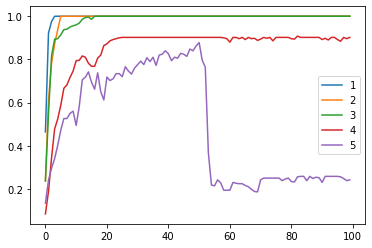

In [6]:
# get dataset
train_x, train_y, test_x, test_y = create_dataset()

# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
	# evaluate model with a given number of layers
	history, result = evaluate_model2(n_layers, train_x, train_y, test_x, test_y)
	print('layers=%d: %.3f' % (n_layers, result))
	# plot learning curve
	plt.plot(history.history['accuracy'], label=str(n_layers))
plt.legend()
plt.show()  

A line plot is also created showing accuracy on the training dataset for each model configuration (1 to 5 layers) over the 100 training epochs. We can see that the model's dynamics with 1, 2, 3, and 4 layers are similar, quickly learning the problem. Surprisingly, training with five layers shows signs of initially doing well, then leaping up, suggesting that the model is likely stuck with a sub-optimal set of weights rather than overfitting the training dataset.

# 3 Configure Gradient Precision with Batch Size

Neural networks are trained using gradient descent, where the estimate of the error used to update the weights is calculated based on a subset of the training dataset. The **number of examples** from the training dataset used in the estimate of the error gradient is called the **batch size**. It is a crucial hyperparameter that influences the dynamics of the learning algorithm. It is essential to explore your model's dynamics to ensure that you are getting the most out of it. This section will discover three different flavors of gradient descent and how to explore and diagnose the effect of batch size on the learning process.

## 3.1 Batch Size and Gradient Descent

Neural networks are trained using the stochastic gradient descent optimization algorithm. This involves using the current state of the model to make a prediction, comparing the prediction to the actual values, and using the difference as an estimate of the error gradient. This error
gradient is then used to update the model weights, and the process is repeated. The error gradient is a statistical estimate. The more training examples used in the estimate, the more accurate this estimate will be, and the more likely the weights of the network will be adjusted to improve the model's performance. The improved estimate of the error gradient comes at the computational cost of using the model to make many more predictions before the estimate can be calculated. In turn, the weights updated.


> Optimization algorithms that use the entire training set are called **batch** or **deterministic gradient** methods because they process all of the training examples simultaneously in a large batch.

**Using fewer examples** results in a less accurate estimate of the error gradient that is highly dependent on the specific training examples used. This results in a noisy estimate that, in turn, results in noisy updates to the model weights, e.g., many updates with perhaps quite different estimates of the error gradient. Nevertheless, **these noisy updates can result in faster learning and sometimes a more robust model**.

> Optimization algorithms that use only a single example at a time are sometimes called **stochastic** or sometimes **online methods**. The term online is usually reserved when the examples are drawn from a stream of continually created examples rather than from a fixed-size training set over which several passes are made.

The number of training examples used in estimating the error gradient is a **hyperparameter** for the learning algorithm called the **batch size**, or merely the batch. A batch size of 32 means that 32 samples from the training dataset will estimate the error gradient before the model weights are updated. One training epoch means that the learning algorithm has made one pass through the training dataset (using every example once), where examples were separated into randomly selected batch size groups.

Historically, a training algorithm where the **batch size is set to the total number of training** examples is called **batch gradient descent** and a training algorithm where the **batch size is set to 1 training example** is called **stochastic gradient descent** or online gradient descent. A configuration of the batch size anywhere in between (e.g., more than 1 example and less than the number of examples in the training dataset) is called **minibatch gradient descent**.

In [ ]:
# Execute again the code of Section 2.1 - The problem

## 3.2 MLP Fit with Batch Gradient Descent

Train: 0.806, Test: 0.830


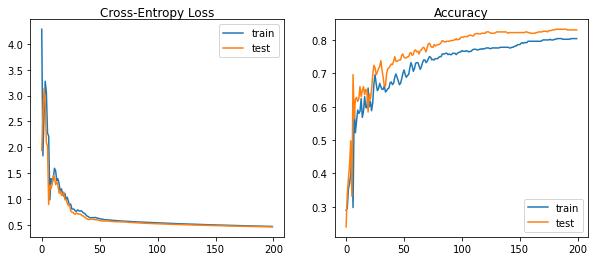

In [3]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
# batch_size has the same size of train dataset
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=200, verbose=0, batch_size=len(train_x))

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# create a figure
fig, ax = plt.subplots(1,2,figsize=(10,4))

# plot loss learning curves
ax[0].set_title('Cross-Entropy Loss', pad=-40)
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend(loc='best')

# plot accuracy learning curves
ax[1].set_title('Accuracy', pad=-40)
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend(loc='best')

plt.show()

A line plot of model loss and classification accuracy on the train (blue) and test (orange) dataset is created. We can see that the model is relatively slow to learn this problem, converging on a solution after about 100 epochs, after which changes in model performance are minor.

## 3.3 MLP Fit with Stochastic Gradient Descent

Train: 0.512, Test: 0.526


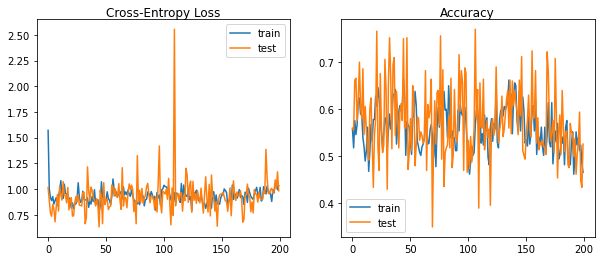

In [5]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
# batch_size has the same size of train dataset
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=200, verbose=0, batch_size=1)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# create a figure
fig, ax = plt.subplots(1,2,figsize=(10,4))

# plot loss learning curves
ax[0].set_title('Cross-Entropy Loss', pad=-40)
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend(loc='best')

# plot accuracy learning curves
ax[1].set_title('Accuracy', pad=-40)
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend(loc='best')

plt.show()

Stochastic gradient descent requires that the model make a prediction and have the weights updated for each training example. This has the effect of dramatically slowing down the training process as compared to batch gradient descent. This change expects that the
the model learns faster (e.g., in terms of the learning curve), and that changes to the model are noisy, resulting, in turn, in noisy performance over the training epoch.

> **Note**: Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that performance was similar between the train and test sets, around 50% accuracy, but was dramatically worse (about 30 percentage points) than using batch gradient descent. **At least for this problem and the chosen model and model configuration, stochastic (online) gradient descent is not appropriate.**

> The poor performance and erratic changes to the model suggest that the learning rate used to update weights after each training example may be too large and that a lower learning rate may make the learning process more stable.

Train: 0.856, Test: 0.826


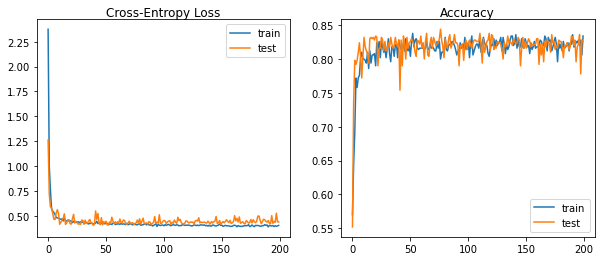

In [6]:
#
# the unique change is related to lr=0.001
#
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
# batch_size has the same size of train dataset
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=200, verbose=0, batch_size=1)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# create a figure
fig, ax = plt.subplots(1,2,figsize=(10,4))

# plot loss learning curves
ax[0].set_title('Cross-Entropy Loss', pad=-40)
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend(loc='best')

# plot accuracy learning curves
ax[1].set_title('Accuracy', pad=-40)
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend(loc='best')

plt.show()

The line plot shows the expected behavior. Namely, the model rapidly learns the problem compared to batch gradient descent, leaping up to about 80% accuracy in about 25 epochs rather than the 100 epochs seen when using batch gradient descent. We could have stopped training at epoch 50 instead of epoch 200 due to the faster training. This is not
surprising. 

- With **batch gradient descent**, 100 epochs involved 100 estimates of error and 100 weight updates. 
- In **stochastic gradient descent**, 25 epochs involved (500 x 25) or 12,500 weight updates, providing more than **10-times more feedback**, albeit more noisy feedback, about improving the model.

The line plot also shows that train and test performance remain comparable during training compared to the dynamics with batch gradient descent, where the test set's performance was slightly better and remained so throughout the training. Unlike batch gradient descent, we
can see that the noisy updates result in noisy performance throughout training. This variance in the model means that it may be challenging to choose which model to use as the final model instead of batch gradient descent, where performance is stabilized because
the model has converged.

> This example highlights the vital **relationship** between **batch size** and the **learning rate**. Namely, more noisy updates to the model require a lower learning rate.

1. **Batch Gradient Descent**: Use a relatively larger learning rate and more training epochs.
2. **Stochastic Gradient Descent**: Use a relatively smaller learning rate and fewer training
epochs.

Mini-batch gradient descent provides an alternative approach.

## 3.4 MLP Fit with Minibatch Gradient Descent

An alternative to stochastic gradient descent and tuning the learning rate is to hold the learning rate constant and change the batch size. In effect, it means that we specify the learning rate or amount of change to apply to the weights each time we estimate the error gradient but to vary the accuracy of the gradient-based on the number of samples used to
estimate it. Holding the learning rate at 0.01 as we did with batch gradient descent, we can set the batch size to 32, a widely adopted default batch size.

Train: 0.826, Test: 0.820


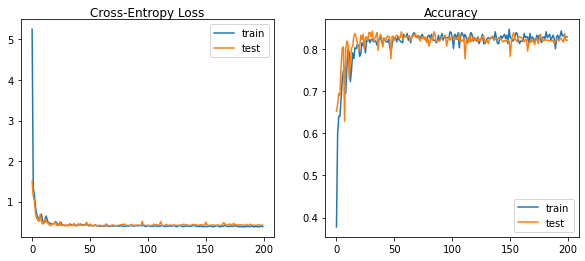

In [7]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
# batch_size has the same size of train dataset
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=200, verbose=0, batch_size=32)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# create a figure
fig, ax = plt.subplots(1,2,figsize=(10,4))

# plot loss learning curves
ax[0].set_title('Cross-Entropy Loss', pad=-40)
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend(loc='best')

# plot accuracy learning curves
ax[1].set_title('Accuracy', pad=-40)
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend(loc='best')

plt.show()

> Running the example reports similar performance on both train and test sets, comparable with batch gradient descent and stochastic gradient descent after we reduced the learning rate.

The line plot shows the dynamics of both stochastic and batch gradient descent. Specifically, the model learns fast and has noisy updates, and stabilizes more towards the end of the run than stochastic gradient descent. Holding learning rate constant and varying the batch
size allows you to dial in the best of both approaches.

## 3.5 Effect of Batch Size on Model Behavior

We can refit the model with different batch sizes and review the impact of the change in batch size on the speed of learning, stability during learning, and the final result.

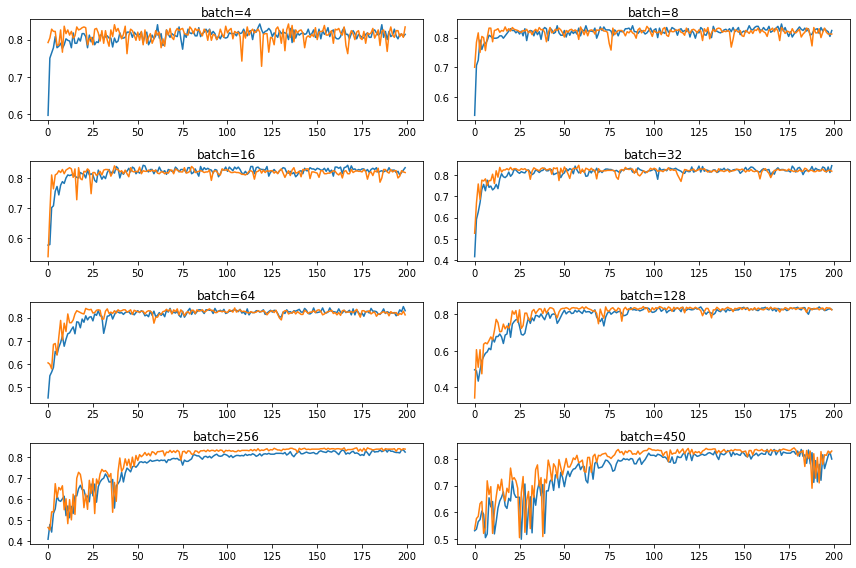

In [8]:
# mlp for the blobs problem with minibatch gradient descent with varied batch size
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	train_x, test_x = x[:n_train, :], x[n_train:, :]
	train_y, test_y = y[:n_train], y[n_train:]
	return train_x, train_y, test_x, test_y

# fit a model and plot learning curve
def fit_model(train_x, train_y, test_x, test_y, n_batch):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# fit model
	history = model.fit(train_x, train_y,
                     validation_data=(test_x, test_y),
                     epochs=200, verbose=0, batch_size=n_batch)
	# plot learning curves
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.title('batch='+str(n_batch), pad=-40)

# prepare dataset
train_x, train_y, test_x, test_y = prepare_data()

fig = plt.figure(figsize=(12, 8))

# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
for i in range(len(batch_sizes)):
	# determine the plot number
	plot_no = 420 + (i+1)
	fig.add_subplot(plot_no)
	# fit model and plot learning curves for a batch size
	fit_model(train_x, train_y, test_x, test_y, batch_sizes[i])
# show learning curves
plt.tight_layout()
plt.show()

The plots show that small-batch results generally in rapid learning but a volatile learning process with higher classification accuracy variance. Larger batch sizes slow down the learning process (in terms of the learning curves), but the final stages result in convergence to
a more stable model exemplified by lower variance in classification accuracy.

# 4 Configure What to Optimize with Loss Functions

Neural networks are trained using stochastic gradient descent and require that you choose a loss function when designing and configuring your model. There are many loss functions to choose from, and it can be challenging to know what to choose, or even what a loss function is and the role it plays when training a neural network. This section will discover the role of loss and loss functions in training deep learning neural networks and how to choose the right loss function for your predictive modeling problems.

## 4.1 Loss Functions

This section will discover **loss functions** and how they have been used to define the nature of the **optimization problem** that is solved when adapting neural network **weights** to a training dataset.

### 4.1.1 Neural Network Learning as Optimization

A deep learning neural network learns to map inputs to a set of outputs from training data. We cannot calculate the perfect weights for a neural network; there are too many unknowns. Instead, learning is cast as a search or optimization problem, and an algorithm is
used to navigate the space of possible sets of weights the model may use to make good or good enough predictions. 

> Typically, a neural network model is trained using the stochastic gradient descent optimization algorithm, and weights are updated using the error algorithm's backpropagation.

The **gradient** in gradient descent refers to an error gradient. The model with a given set of weights is used to make predictions and the error for those predictions is calculated. The gradient descent algorithm seeks to change the weights so that the next evaluation reduces the error, meaning the optimization algorithm is navigating down the gradient (or slope) of error. 

### 4.1.2 What Is a Loss Function and Loss?

In the context of an optimization algorithm, the function used to evaluate a candidate solution (i.e., a set of weights) is referred to as the **objective function**. We may seek to maximize or minimize the objective function, meaning that we are searching for a candidate solution with the highest or lowest score. Typically, with neural networks, we seek to minimize
the error. As such, the **objective function** is often referred to as a **cost function** or a **loss function** and the value calculated by the loss function is referred to as simply loss.

> The function we want to minimize or maximize is called the objective function or criterion. When minimizing it, we may also call it the **cost function**, **loss function**, or **error function**.

The cost or loss function has an essential job in that it must faithfully distill all aspects of the model down into a single number so that improvements in that number are a sign of a better model.

> The cost function reduces all the various good and bad aspects of a possibly complex system down to a single number, a scalar value, which allows candidate solutions to be ranked and compared.

In calculating the error of the model during the optimization process, a loss function must be chosen. This can be a challenging problem as the function must capture the problem's properties and be motivated by concerns that are important to the project and stakeholders.

### 4.1.3 Maximum Likelihood

Many functions could be used to estimate the error of a set of weights in a neural network. We prefer a function where the space of candidate solutions maps onto a smooth (but high-dimensional) landscape that the optimization algorithm can reasonably navigate via iterative updates to the model weights. **Maximum likelihood estimation**, or **MLE**, is a framework for inference for finding the best statistical estimates of parameters from historical training data: precisely what we are trying to do with the neural network.

> Maximum likelihood seeks to find the optimum values for the parameters by maximizing a likelihood function derived from the training data.



### 4.1.4 Maxium Likelihood and Cross-Entropy

Under the maximum likelihood framework, the error between two probability distributions is measured using **cross-entropy**. When modeling a classification problem where we are interested in mapping input variables to a class label, we can model the problem by predicting an example belonging to each class. There would be two classes in a binary classification problem to predict the probability of the example belonging to the first class. In the case of multiple-class classification, we can predict a probability for the example belonging to each of the classes.

**In the training dataset**, the probability of an example belonging to a given class would be 1 or 0. Each sample in the training dataset is a known example from the domain. **We know the answer**. Therefore, under maximum likelihood estimation, we would seek a set of model weights that minimize the difference between the model's predicted probability distribution given the dataset and the probabilities distribution in the training dataset. This is called the **cross-entropy**.

Technically, **cross-entropy** comes from the field of **information theory** and has the unit of bits. It is used to estimate the difference between an estimated and a predicted probability distribution. In the case of **regression problems** where a quantity is predicted, it is familiar to use the **mean squared error** (MSE) loss function instead.

Nevertheless, under the maximum likelihood estimation framework and assuming a Gaussian distribution for the target variable, **mean squared error can be considered the cross-entropy** between the distribution of the model predictions and the distribution of the target variable.

> Many authors use the term **cross-entropy** to identify specifically the negative log-likelihood of a Bernoulli or softmax distribution, but that is a misnomer. **Any loss of a negative log-likelihood is a cross-entropy between the empirical distribution defined by the training set and the probability distribution defined by the model**. For example, mean squared error is the cross-entropy between the empirical distribution and a Gaussian model.

Therefore, when **using the maximum likelihood estimation** framework, **we will implement a cross-entropy loss function**, which often in practice means a <font color="red">cross-entropy loss function for classification</font> problems and a <font color="red">mean squared error loss function for regression problems</font>. Almost universally, deep learning neural networks are trained under the maximum likelihood of using cross-entropy as the loss function.

### 4.1.5 What Loss Function to Use?

We can summarize the previous section and directly suggest the loss functions that you should use under a framework of maximum likelihood. Notably, the loss function's choice is directly related to the activation function used in your neural network's output layer. These two design elements are connected. 

> Think of the conguration of the output layer as a choice about the framing of your prediction problem, and the choice of the loss function as the way to calculate the error for a given framing of your problem.

- <font color="red">Regression Problem</font>
  - **Output layer**: one node with a linear activation unit.
  - **Loss function**: mean squared error (MSE).
- <font color="red">Binary Classification Problem</font>
  - **Output layer**: one node with a sigmoid activation unit.
  - **Loss function**: cross-entropy, also referred to as Logarithmic loss.
- <font color="red">Multiclass Classification Problem</font>
  - **Output layer**: one node for each class using the softmax activation function.
  - **Loss function**: cross-entropy, also referred to as Logarithmic loss.

### 4.1.6 How to implement Loss Functions?

In order to make the loss functions concrete, this section explains how each of the main types of
loss function works and how to calculate the score in Python.

**Mean Squared Error (MSE)**

$
\displaystyle L_{MSE}(y,\hat{y}) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
m=len(y)=len(\hat{y}) 
$


In [11]:
# calculate mean squared error
def mean_squared_error(actual, predicted):
  sum_square_error = 0.0
  for i in range(len(actual)):
    sum_square_error += (actual[i] - predicted[i])**2.0
  mean_square_error = 1.0 / len(actual) * sum_square_error
  return mean_square_error

In [12]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true,y_pred)

0.375

In [13]:
import tensorflow as tf
tf.keras.losses.mean_squared_error(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.375>

**Cross-Entropy Loss (or Log Loss)**

**Cross-entropy loss** is often referred to as cross-entropy, logarithmic loss, logistic loss, or log loss for short. 

> Each predicted probability is compared to the actual class output value (0 or 1), and a score is calculated that penalizes the probability based on the distance from the expected value. 

The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and an enormous score for a large difference (0.9 or 1.0).

**Cross-entropy loss is minimized, where smaller values represent a better model than larger values**. 

> A model that predicts perfect probabilities has a cross-entropy or log loss of 0.0 (in practice, the best possible loss will be a value very close to zero, but not exactly zero).

Cross-entropy for a binary or two-class prediction problem is calculated as the average cross-entropy across all examples.

**Binary Cross-Entropy (CE)**

$
\displaystyle L_{CE} (y,\hat{y}) = - \frac{1}{m}\sum_{i=1}^{m} y_i \times \log{(\hat{y_i})} + (1-y_i)\times \log{(1 - \hat{y_i})}
$

In [14]:
from math import log

# calculate binary cross-entropy
def binary_cross_entropy(actual, predicted):
  sum_score = 0.0
  m = len(actual)
  for i in range(m):
    #1e-7 is used to avoid log(0)
    sum_score += actual[i] * log(1e-7 + predicted[i]) + (1 - actual[i]) * log(1e-7 + 1 - predicted[i])
  mean_sum_score = 1.0 / m * sum_score
  return -mean_sum_score

In [23]:
y_true = [1.0, 1.0, 0.0, 1.0]
y_pred = [0.9, 0.3, 0.5, 0.8]
binary_cross_entropy(y_true,y_pred)

0.5564058206033906

In [16]:
tf.keras.losses.binary_crossentropy(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5564058>

In [17]:
y_true = [1.0, 1.0, 0.0, 1.0]
y_pred = [0.999, 0.999, 0.001, 0.999]
binary_cross_entropy(y_true,y_pred)

0.0010004002334884693

In [18]:
tf.keras.losses.binary_crossentropy(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0010003682>

**Categorical cross-entropy (CCE)**

$
\displaystyle L_{CCE} (y,\hat{y}) = - \frac{1}{m}\sum_{j=1}^{m} \sum_{i=1}^{c} (y_{ji} \times \log{(\hat{y_{ji}})}
$

where $m$ is the number of observations and $c$ is the number of classes.

In [24]:
from math import log

# calculate binary cross-entropy
def categorical_cross_entropy(actual, predicted):
  sum_score = 0.0
  m = len(actual)
  c = len(actual[0])
  for j in range(m):
    for i in range(c):
      #1e-7 is used to avoid log(0)
      sum_score += actual[j][i] * log(1e-7 + predicted[j][i])
  mean_sum_score = 1.0 / m * sum_score
  return -mean_sum_score

In [26]:
categorical_cross_entropy(y_true,y_pred)

1.176938641059472

In [25]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
print(tf.keras.losses.categorical_crossentropy(y_true,y_pred))
print(tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true,y_pred)))

tf.Tensor([0.05129331 2.3025851 ], shape=(2,), dtype=float32)
tf.Tensor(1.1769392, shape=(), dtype=float32)


### 4.1.7 Loss Functions and Reported Model Performance

Given the maximum likelihood framework, we want to use a cross-entropy or mean squared error loss function in general with stochastic gradient descent. Nevertheless, **we may or may not want to report the model's performance using the loss function**. For example, the logarithmic loss is challenging to interpret, especially for non-machine learning practitioner stakeholders.

The same can be said for the mean squared error. Instead, it may be more important to report the accuracy and root mean squared error for models used for classification and regression, respectively.

**It may also be desirable to choose models based on these metrics instead of a loss**. This is an important consideration, as the minimum loss model may not be the model with the best metric that is important to project stakeholders. 

> <font color="red">An excellent division to consider is to use the loss to evaluate and diagnose how well the model is learning</font>. 

This includes all of the optimization process considerations, such as overfitting, underfitting, and convergence. **An alternate metric can then be chosen that has meaning to the project stakeholders** to both evaluate the model performance and perform model selection.


- **Loss**: Used to evaluate and diagnose model optimization only.
- **Metric**: Used to evaluate and choose models in the context of the project.

The same metric can be used for both concerns, but it is more likely that the concerns of the optimization process will continue to differ from the goals of the project, and different scores will be required. Nevertheless, it is often the case that improving the loss improves or, at worst, has no effect on the metric of interest.

## 4.2 Regression Loss Functions - Case Study

Train: 0.003, Test: 0.008
Train: 0.002, Test: 0.007
Train: 0.042, Test: 0.050


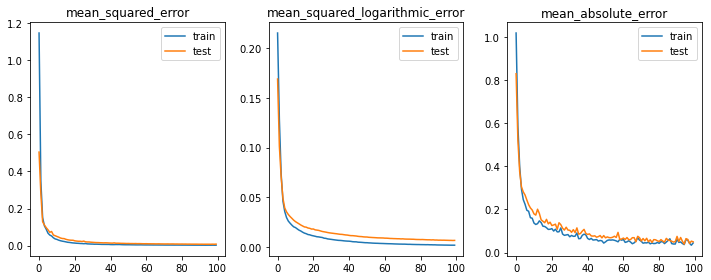

In [27]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow as tf

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

fig, ax = plt.subplots(1,3,figsize=(10,4))
losses = ['mean_squared_error',
          'mean_squared_logarithmic_error',
          'mean_absolute_error']

for i in range(len(losses)):
  # define model
  model = Sequential()
  model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='linear'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(loss=losses[i], optimizer=opt)

  # fit model
  history = model.fit(train_x, train_y, 
                      validation_data=(test_x, test_y), 
                      epochs=100, verbose=0)

  # evaluate the model
  train_mse = model.evaluate(train_x, train_y, verbose=0)
  test_mse = model.evaluate(test_x, test_y, verbose=0)

  print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
  # plot loss during training
  ax[i].set_title(losses[i])
  ax[i].plot(history.history['loss'], label='train')
  ax[i].plot(history.history['val_loss'], label='test')
  ax[i].legend(loc='best')
plt.tight_layout()
plt.show()

The **Mean Squared Error**, or **MSE**, is the default loss to use for regression problems. 
> Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. 

**It is the loss function to be
evaluated first and only changed if you have a good reason**. Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is
always positive regardless of the sign of the predicted and actual values, and a perfect value is 0.0. The squaring means that bigger mistakes result in more errors than smaller mistakes, meaning that the model is punished for making bigger mistakes.

We can see in the results that the model converged reasonably
quickly, and both train and test performance remained equivalent. The performance and convergence behavior of the model suggest that mean squared error is a good match for a neural network learning this problem.

There may be regression problems in which the target value has a spread of values, and when predicting a large value, you may not want to punish a model as heavily as mean squared error. Instead, you can first calculate the natural logarithm of each of the predicted values, then
calculate the mean squared error. This is called the **Mean Squared Logarithmic Error** loss, or **MSLE** for short. 

> It has the effect of relaxing the punishing effect of large differences in large predicted values.

As a loss measure, **it may be more appropriate when the model is predicting unscaled quantities directly**.

On some regression problems, the distribution of the target variable may be mostly Gaussian but may have outliers, e.g., large or small values far from the mean value. The **Mean Absolute Error**, or **MAE** is an appropriate loss function in this case as it is **more robust to outliers**. 

In the results, we can see that MAE does converge but shows a bumpy course, although the dynamics of MSE don't appear greatly affected. We know that the target variable is a standard Gaussian with no large outliers, so MAE would not be a good t in this case.

## 4.3 Binary Classification Loss Functions - Case Study

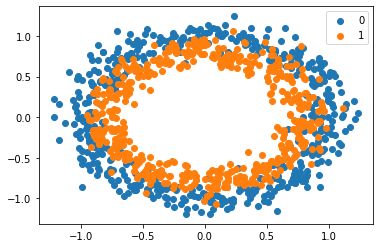

In [29]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# generate circles
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
	samples_ix = np.where(y == i)
	plt.scatter(x[samples_ix, 0], x[samples_ix, 1], label=str(i))
plt.legend()
plt.show()

Train: 0.834, Test: 0.842
Train: 0.842, Test: 0.830
Train: 0.832, Test: 0.832


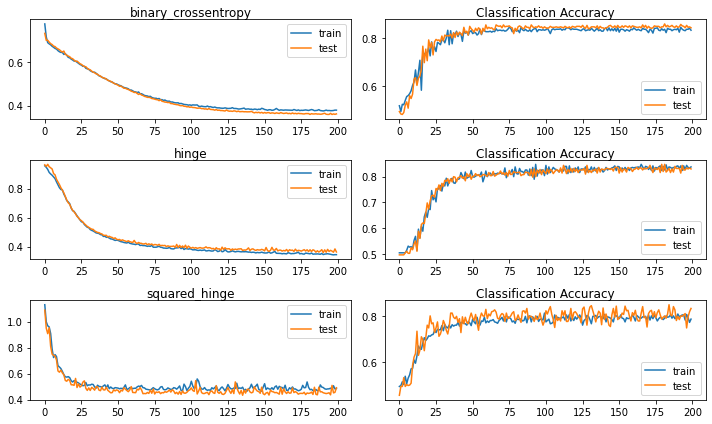

In [30]:
# mlp for the circles problem with cross-entropy loss
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

fig, ax = plt.subplots(3,2,figsize=(10,6))
losses = ['binary_crossentropy',
          'hinge',
          'squared_hinge']

for i in range(len(losses)):

  if i == 0:
    output_activation = "sigmoid"
  else:
    output_activation = "tanh"

  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation=output_activation))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(loss=losses[i], optimizer=opt, metrics=['accuracy'])

  # fit model
  history = model.fit(train_x, train_y,
                      validation_data=(test_x, test_y), 
                      epochs=200, verbose=0)

  # evaluate the model
  _, train_acc = model.evaluate(train_x, train_y, verbose=0)
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

  # plot loss during training
  ax[i,0].set_title(losses[i], pad=-20)
  ax[i,0].plot(history.history['loss'], label='train')
  ax[i,0].plot(history.history['val_loss'], label='test')
  ax[i,0].legend(loc='best')

  # plot accuracy during training
  ax[i,1].set_title('Classification Accuracy', pad=-40)
  ax[i,1].plot(history.history['accuracy'], label='train')
  ax[i,1].plot(history.history['val_accuracy'], label='test')
  ax[i,1].legend(loc='best')

plt.tight_layout()
plt.show()

**Cross-entropy** is the default loss function to use for binary classification problems. It is intended for use with binary classification where the target values are in the set \{0, 1\}. **Mathematically, it is the preferred loss function under the inference framework of maximum likelihood**. It is the
loss function to be evaluated first and only changed if you have a good reason. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized, and a perfect cross-entropy value is 0.

**The result shows that the training process converged well**. The plot for
loss is smooth, given the continuous nature of the error between the probability distributions, whereas the line plot for accuracy shows bumps, given examples in the train and test set can ultimately only be predicted as correct or incorrect, providing less granular feedback on performance.

An alternative to cross-entropy for binary classification problems is the **hinge loss** function, primarily developed for use with Support Vector Machine (SVM) models. **It is intended for use with binary classification where the target values are in the set \{-1, 1\}**. The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values. **Reports of performance with the hinge loss are mixed**, sometimes resulting in better performance than cross-entropy on binary classification problems. **Firstly, the target variable must be modified to have values in the set \{-1, 1\}**.

The plot of hinge loss shows that the model has converged and has a reasonable loss on both datasets. The plot of classification accuracy also shows signs of convergence, albeit at a lower level of skill than may be desirable on this problem.

The hinge loss function has many extensions, often the subject of the investigation with SVM models. A popular extension is called the **squared hinge loss** that simply calculates the square of the score hinge loss. **It has the effect of smoothing the surface of the error** function and making
it numerically easier to work with. If using a hinge loss does result in better performance on a given binary classification problem, it is likely that a squared hinge loss may be appropriate.

The plot of loss shows that indeed, the model converged, but the shape of the error surface is not as smooth as other loss functions where small changes to the weights are causing large changes in loss.

## 4.4 Multiclass Classification Loss Functions - Case Study

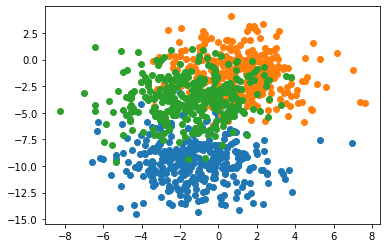

In [31]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# generate dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
for i in range(3):
	samples_ix = np.where(y == i)
	plt.scatter(x[samples_ix, 0], x[samples_ix, 1])
plt.show()

Train: 0.824, Test: 0.822
Train: 0.830, Test: 0.814
Train: 0.834, Test: 0.816


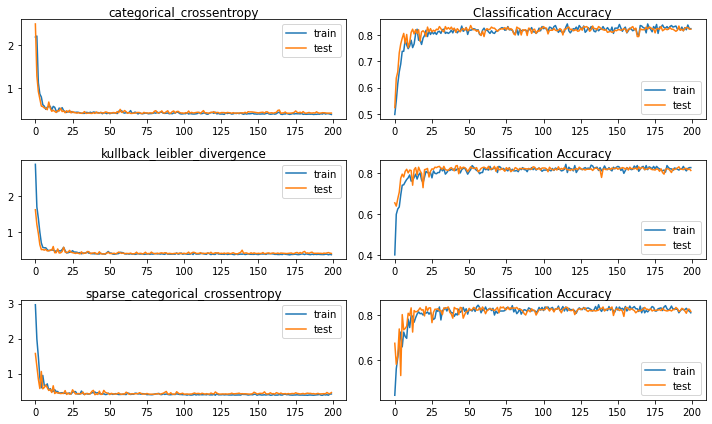

In [32]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y2 = y
y = to_categorical(y)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


fig, ax = plt.subplots(3,2,figsize=(10,6))
losses = ['categorical_crossentropy',
          'kullback_leibler_divergence',
          'sparse_categorical_crossentropy']

for i in range(len(losses)):

  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(loss=losses[i], optimizer=opt, metrics=['accuracy'])

  if i == 2:
    # sparse categorical crossentropy requires y not be represented in one hot encoding
    train_y  = y2[:n_train]
    test_y  =  y2[n_train:]
      
  # fit model
  history = model.fit(train_x, train_y,
                      validation_data=(test_x, test_y), 
                      epochs=200, verbose=0)

  # evaluate the model
  _, train_acc = model.evaluate(train_x, train_y, verbose=0)
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

  # plot loss during training
  ax[i,0].set_title(losses[i], pad=-20)
  ax[i,0].plot(history.history['loss'], label='train')
  ax[i,0].plot(history.history['val_loss'], label='test')
  ax[i,0].legend(loc='best')

  # plot accuracy during training
  ax[i,1].set_title('Classification Accuracy', pad=-40)
  ax[i,1].plot(history.history['accuracy'], label='train')
  ax[i,1].plot(history.history['val_accuracy'], label='test')
  ax[i,1].legend(loc='best')

plt.tight_layout()
plt.show()

**Cross-entropy** is the default loss function to use for multiclass classification problems. In this case, it is intended for use with multiclass classification where the target values are in the set \{0, 1, 3, ..., n\}, where each class is assigned a unique integer value.

> Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. 

It is the loss function to be evaluated first and only changed if you have a good reason. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized, and a perfect cross-entropy value is 0.

The result shows the model seems to have converged. The line plots for both cross-entropy and accuracy both show good convergence behavior, although somewhat bumpy. The model may be well configured, given no sign of over or underfitting. The
learning rate or batch size may be tuned to even out the smoothness of the convergence in this case.

A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one-hot encoding process. For example, predicting words in a
vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one-hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory. **Sparse
cross-entropy** addresses this by performing the same cross-entropy calculation of error without requiring that the target variable be one-hot encoded prior to training.

**Kullback Leibler Divergence**, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution. **A KL divergence loss of 0 suggests the distributions are identical**. 

> In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

As such, the **KL divergence loss function is more commonly used when using models that learn to approximate a more complex function** than simply multiclass classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be
preferred. Nevertheless, **it can be used for multiclass classification, in which case it is functionally equivalent to multiclass cross-entropy**.

In the result, the plot shows good convergence behavior for both loss and
classification accuracy. It is very likely that an evaluation of cross-entropy would result in nearly identical behavior given the similarities in the measure.

# 5 Configure Speed of Learning with Learning Rate

The **weights** of a neural network **cannot** be calculated using an **analytical method**. Instead, the weights must be discovered via an empirical optimization procedure called stochastic gradient descent. 

1. The optimization problem addressed by stochastic gradient descent for neural networks is challenging, and the space of solutions (sets of weights) may be comprised of many good solutions (called **global optima**) as well as easy to find, but low in skill solutions (called **local
optima**). 
2. The amount of change to the model during each step of this search process, or the step size, is called the **learning rate** and provides perhaps the **most important hyperparameter** to tune for your neural network in order to achieve good performance on your problem. 

In this section, you will discover the learning rate hyperparameter used when training deep learning neural networks. After completing this section, you will know:

- Learning rate controls how quickly or slowly a neural network model learns a problem.
- How to configure the learning rate with sensible defaults, diagnose behavior, and develop a sensitivity analysis.
- How to further improve performance with learning rate schedules, momentum, and adaptive learning rates.

## 5.1 Learning Rate



In this section, you will discover the learning rate, the effect it has on the model during training, and tips on how to configure the learning rate when training your own neural network models.

### 5.1.1 What Is the Learning Rate?

Deep learning neural networks are trained using the stochastic gradient descent algorithm. Stochastic gradient descent is an optimization algorithm that estimates the error gradient for the
the current state of the model using examples from the training dataset then updates the weights of the model using the backpropagation of errors algorithm, referred to as simply backpropagation.

The amount that the weights are updated during training is referred to as the step size or the **learning rate**. 

> Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that have a small positive value, often in the range between 0.0 and 1.0.

The **learning rate** is often represented using the notation of the lowercase Greek letter eta ($\eta$). 

1. During training, the backpropagation of error estimates the amount of error for which each weight in a node in the network is responsible. 
2. Instead of updating the weight with the full
amount, it is scaled by the learning rate. 
3. This means that a learning rate of 0.1, a traditionally common default value, would mean that weights in the network are updated 0.1  (estimated weight error) or 10% of the estimated weight error each time the weights are updated.

### 5.1.2 Effect of Learning Rate

A neural network learns or approximates a function to best map inputs to outputs from examples in the training dataset. The learning rate hyperparameter controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the weights
of the model are updated with each time they are updated, such as at the end of each batch of training examples. Given a perfectly configured learning rate, the model will learn to best approximate the function given available resources (the number of layers and the number of nodes per layer) in a given number of training epochs (passes through the training data).

Generally:
- A **large learning rate** allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. 
- A **lower learning rate** may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train. 

At extremes, a **learning rate** that is **too large** will result in **weight updates** that will be **too large***, and the performance of the model (such as its loss on the training dataset) will oscillate over training
epochs. Oscillating performance is said to be caused by weights that diverge (are divergent). **A learning rate that is too small may never converge** or may get stuck on a suboptimal solution.

### 5.1.3 How to Configure Learning Rate?

It is important to find a good value for the learning rate for your model on your training dataset. The learning rate may, in fact, be the most important hyperparameter to configure for your model.

> Unfortunately, we cannot analytically calculate the optimal learning rate for a given model on a given dataset. Instead, a good (or good enough) learning rate must be discovered via trial and error.

The range of values to consider for the learning rate is less than $1.0$ and greater than $10^{-6}$.

The learning rate will interact with many other aspects of the optimization process, and the interactions may be nonlinear. Nevertheless, in general, lower learning rates will require more training epochs. Conversely, larger learning rates will require fewer training epochs. Further, smaller batch sizes are better suited to smaller learning rates given the noisy estimate of the error gradient. A traditional default value for the learning rate is 0.1 or 0.01, and this may represent a good starting point on your problem.

> A default value of 0.01 typically works for standard multi-layer neural networks but
it would be foolish to rely exclusively on this default value.

**Diagnostic plots** can be used to **investigate how the learning rate impacts** the rate of learning and learning dynamics of the model. One example is to create a **line plot of loss over training epochs during training**. The line plot can show many properties, such as:

- The rate of learning over training epochs, such as fast or slow.
- Whether the model has learned too quickly (sharp rise and plateau) or is learning too slowly (little or no change).
- Whether the learning rate might be too large via oscillations in loss.


> Configuring the learning rate is challenging and time-consuming.

An alternative approach is to perform a **sensitivity analysis** of the learning rate for the chosen model, also called a **grid search**. This can help to both highlight an order of magnitude where good learning rates may reside, as well as describe the relationship between learning rate and
performance. It is common to grid search learning rates on a log scale from $0.1$ to $10^{-5}$ or $10^{-6}$. **This method will be described later in this course**.

When plotted, the results of such a sensitivity analysis often show a **U shape**, where loss decreases (performance improves) as the learning rate is decreased with a fixed number of training epochs to a point where loss sharply increases again because the model fails to converge.

### 5.1.4 Add Momentum to the Learning Process

Training a neural network can be made easier with the addition of history to the weight update. Specifically, an exponentially weighted average of the prior updates to the weight can be included when the weights are updated. This change to stochastic gradient descent is called **momentum**
and **adds inertia to the update procedure**, causing many past updates in one direction to continue in that direction in the future.

> The momentum algorithm accumulates an exponentially decaying moving average of past gradients and continues to move in their direction.

**Momentum can accelerate learning** on those problems where the high-dimensional weight space that is being navigated by the optimization process has structures that mislead the gradient descent algorithm, **such as flat regions or steep curvature**.

The amount of inertia of past updates is controlled via the addition of **a new hyperparameter**, often referred to as the **momentum or velocity**, and uses the notation of the Greek lowercase letter alpha ($\alpha$).

> This hyperparameter has the effect of smoothing the optimization process, slowing updates to continue in the previous direction instead of getting stuck or oscillating.

Momentum is set to a value greater than $0.0$ and less than $one$, where common values such
as $0.9$ and $0.99$ are used in practice.

> Momentum does not make it easier to configure the learning rate, as the step size is independent of the momentum. 

Instead, **momentum can improve the speed of the optimization process** in concert with the step size, improving the likelihood that a better set of weights is discovered in fewer training epochs.

### 5.1.5 Use a Learning Rate Schedule

An alternative to using a fixed learning rate is to instead vary the learning rate over the training process. The way in which the learning rate changes over time (training epochs) is referred to as the **learning rate schedule** or **learning rate decay**. 

> Perhaps the simplest learning rate schedule is to decrease the learning rate linearly from a large initial value to a small value. 

This allows large weight changes at the beginning of the learning process and small changes or fine-tuning towards the end of the learning process.

In fact, **using a learning rate schedule may be a best practice when training neural networks**. Instead of choosing a fixed learning rate hyperparameter, <font color='red'>the configuration challenge involves choosing the initial learning rate and a learning rate schedule</font>. 

> It is possible that the choice of
the initial learning rate is less sensitive than choosing a fixed learning rate, given the better
performance that a learning rate schedule may permit. 

The learning rate can be decayed to a small value close to zero. Alternately, the learning rate can be decayed over a fixed number of training epochs, then kept constant at a small value for the remaining training epochs to
facilitate more time fine-tuning.

> In practice, it is common to decay the learning rate linearly until epoch $k$. After iteration $k$, it is common to leave **the learning rate constant**.

### 5.1.6 Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm
and the learning rate can be adjusted in response. This is called an **adaptive learning rate**.

1. Perhaps the **simplest implementation** is to make the learning rate smaller once the performance
of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of
magnitude.
2. Alternately, the **learning rate can be increased again if performance does not improve for a fixed number of training epochs**. An adaptive learning rate method will generally outperform a model with a badly configured learning rate.

> The difficulty of choosing a good learning rate a priori is one of the reasons adaptive learning rate methods are so useful and popular. A good adaptive algorithm will usually converge much faster than simple backpropagation with a poorly chosen fixed learning rate.

**Although no single method works best on all problems**, there are three adaptive learning rate methods that have proven to be robust over many types of neural network architectures and problem types. They are **AdaGrad**, **RMSProp**, and **Adam**, and all maintain and adapt
learning rates for each of the weights in the model. 

> Perhaps the most popular is **Adam**, as it builds upon **RMSProp** and adds **momentum**.

At this point, a natural question is: **which algorithm should one choose?** Unfortunately, there is currently no consensus on this point. Currently, the most popular optimization algorithms actively in use include:
- SGD
- SGD with momentum
- RMSProp
- RMSProp with momentum
- AdaDelta
- Adam

A robust strategy may be to first evaluate the performance of a model with a modern version of stochastic gradient descent with adaptive learning rates, such as Adam, and use the result as a baseline. Then, if time permits, explore whether improvements can be achieved with a
carefully selected learning rate or simpler learning rate schedule.

## 5.2 Learning Rate Case Study

### 5.2.1 Multiclass Classification Problem

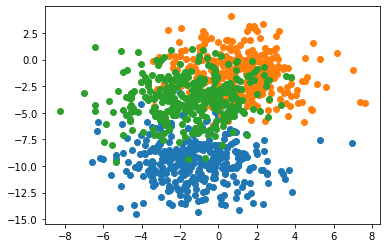

In [33]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])

# show plot
plt.show()

### 5.2.2 Effect of Learning Rate and Momentum

#### 5.2.2.1 Learning rates dynamics

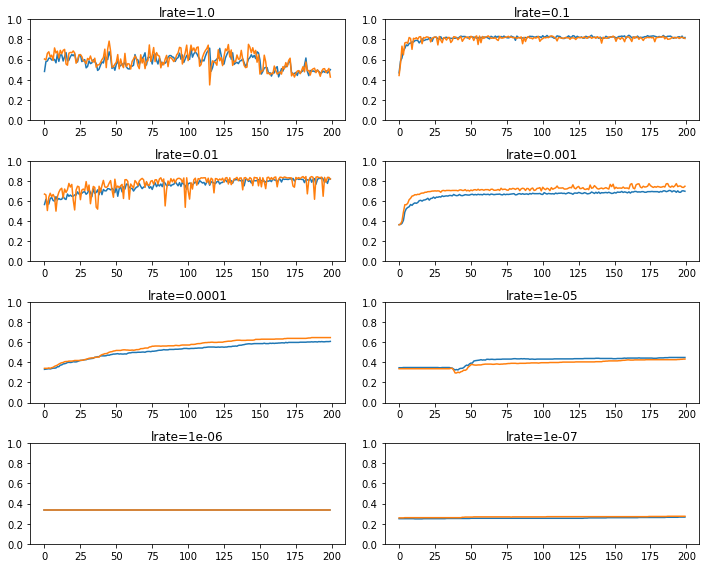

In [34]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	
  # one hot encode output variable
	y = to_categorical(y)
	
  # split into train and test
	n_train = 500
	train_x, test_x = x[:n_train, :], x[n_train:, :]
	train_y, test_y = y[:n_train], y[n_train:]
	return train_x, train_y, test_x, test_y

# fit a model and plot learning curve
def fit_model(train_x, train_y, test_x, test_y, lrate):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	opt = SGD(lr=lrate)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# fit model
	history = model.fit(train_x, train_y,
                     validation_data=(test_x, test_y),
                     epochs=200, verbose=0)
 
	# plot learning curves
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.title('lrate='+str(lrate), pad=-50)

# prepare dataset
train_x, train_y, test_x, test_y = prepare_data()

# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

# create a figure
fig = plt.figure(figsize=(10, 8))

for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	fig.add_subplot(plot_no,ylim=(0,1))
 
	# fit model and plot learning curves for a learning rate
	fit_model(train_x, train_y, test_x, test_y, learning_rates[i])
 
# show learning curves
plt.tight_layout()
plt.show()

The plots show oscillations in behavior for the too-large learning rate of 1.0 and the inability
of the model to learn anything with the too-small learning rates of 1E-6 and 1E-7. We can
see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2
and 1E-3, although successively slower as the learning rate was decreased. With the chosen
model configuration, the results suggest a moderate learning rate of 0.1 results in good model
performance on the train and test sets.

#### 5.2.2.2 Momentum Dynamics

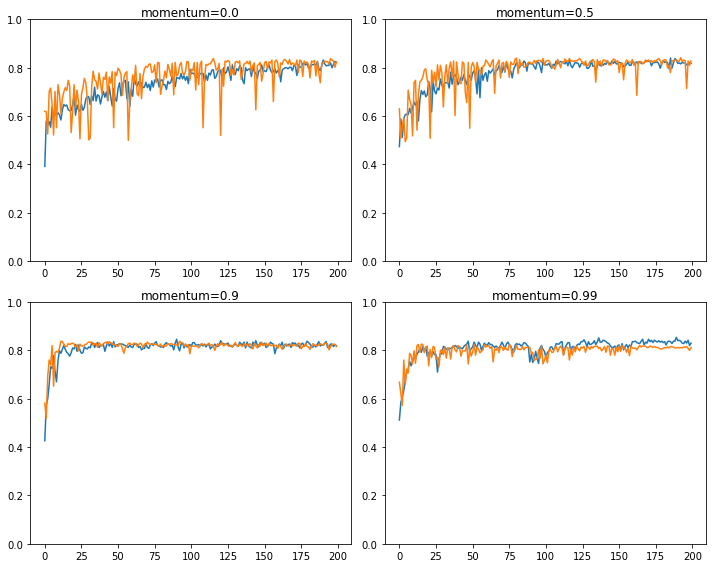

In [35]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	
  # one hot encode output variable
	y = to_categorical(y)
	
  # split into train and test
	n_train = 500
	train_x, test_x = x[:n_train, :], x[n_train:, :]
	train_y, test_y = y[:n_train], y[n_train:]
	return train_x, train_y, test_x, test_y

# fit a model and plot learning curve
def fit_model(train_x, train_y, test_x, test_y, momentum):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	opt = SGD(lr=0.01, momentum=momentum)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# fit model
	history = model.fit(train_x, train_y,
                     validation_data=(test_x, test_y),
                     epochs=200, verbose=0)
 
	# plot learning curves
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.title('momentum='+str(momentum), pad=-80)

# prepare dataset
train_x, train_y, test_x, test_y = prepare_data()

# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]

# create a figure
fig = plt.figure(figsize=(10, 8))

for i in range(len(momentums)):
	# determine the plot number
	plot_no = 220 + (i+1)
	fig.add_subplot(plot_no,ylim=(0,1))
 
	# fit model and plot learning curves for a learning rate
	fit_model(train_x, train_y, test_x, test_y, momentums[i])
 
# show learning curves
plt.tight_layout()
plt.show()

We can see that the addition of momentum does accelerate the training of the model. Specifically, momentum values of 0.9 and 0.99 achieve reasonable train and test accuracy within about 50 training epochs as opposed to 200 training epochs when momentum is not used. In all
cases where momentum is used, the accuracy of the model on the holdout test dataset appears to be more stable, showing less volatility over the training epochs.

### 5.2.3 Effect of Learning Rate Schedules

We will look at two learning rate schedules in this section. The first is the decay built into the SGD class and the second is the [ReduceLROnPlateau callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau).

#### 5.2.3.1 Learning Rate Decay

The SGD class provides the decay argument that specifies the learning rate decay. It may not
be clear from the equation or the code as to the effect that this decay has on the learning rate
over updates. We can make this clearer with a worked example. The function below implements
the learning rate decay as implemented in the SGD class.

In [36]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
  return initial_lrate * (1.0 / (1.0 + decay * iteration))

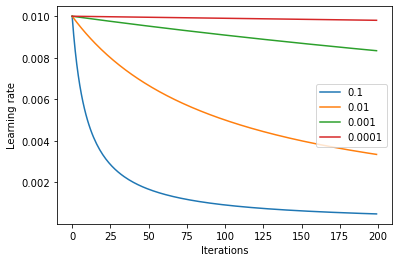

In [37]:
# demonstrate the effect of decay on the learning rate
import matplotlib.pyplot as plt

decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	plt.plot(lrates, label=str(decay))
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("Learning rate")
plt.show()

Running the example creates a line plot showing **learning rates over updates** for different decay values. We can see that in all cases, the learning rate starts at the initial value of 0.01.

We can see that a small decay value of 1E-4 (red) has almost no effect, whereas a large decay value of 1E-1 (blue) has a dramatic effect, reducing the learning rate to below 0.002 within 50 iterations (about one order of magnitude less than the initial value) and arriving at the final value
of about 0.0004 (about two orders of magnitude less than the initial value).

> We can see that the change to the learning rate is not linear. 

We can also see that changes to the learning rate are dependent on the batch size, after which an update is performed. 

In the example from the previous section, a default batch size of 32 across 500 examples results in 16 updates per epoch and 3,200 updates across the 200 epochs. Using a decay of 0.1 and an initial learning rate of 0.01, we can calculate the final learning rate to be a tiny value of about 3.1E-05.

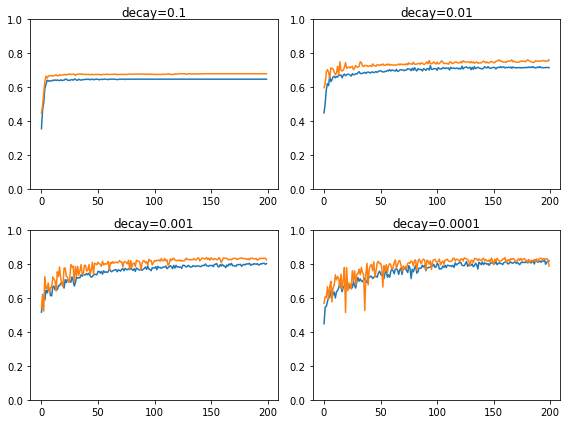

In [38]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	
  # one hot encode output variable
	y = to_categorical(y)
	
  # split into train and test
	n_train = 500
	train_x, test_x = x[:n_train, :], x[n_train:, :]
	train_y, test_y = y[:n_train], y[n_train:]
	return train_x, train_y, test_x, test_y

# fit a model and plot learning curve
def fit_model(train_x, train_y, test_x, test_y, decay):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	opt = SGD(lr=0.01, decay=decay)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# fit model
	history = model.fit(train_x, train_y,
                     validation_data=(test_x, test_y),
                     epochs=200, verbose=0)
 
	# plot learning curves
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.title('decay='+str(decay), pad=-80)

# prepare dataset
train_x, train_y, test_x, test_y = prepare_data()

# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]

# create a figure
fig = plt.figure(figsize=(8, 6))

for i in range(len(decay_rates)):
	# determine the plot number
	plot_no = 220 + (i+1)
	fig.add_subplot(plot_no,ylim=(0,1))
 
	# fit model and plot learning curves for a learning rate
	fit_model(train_x, train_y, test_x, test_y, decay_rates[i])
 
# show learning curves
plt.tight_layout()
plt.show()

We can see that the large decay values of 1E-1 and 1E-2 indeed decay the learning rate too
rapidly for this model on this problem and result in poor performance. The smaller decay values
result in better performance, with the value of 1E-4 perhaps causing in a similar result as not
using decay at all. In fact, we can calculate the final learning rate with a decay of 1E-4 to be
about 0.0075, only a little bit smaller than the initial value of 0.01.

#### 5.2.3.2 Drop Learning Rate on Plateau

The **ReduceLROnPlateau** will drop the learning rate by a factor after no change in a monitored
metric for a given number of epochs. We can explore the effect of different patience values, which is the number of epochs to wait for a change before dropping the learning rate. 

We will use the default learning rate of $0.01$ and drop the learning rate by an order of magnitude by setting the factor argument to 0.1.

$
new\_lr = lr * factor
$

It will be interesting to review the effect on the learning rate over the training epochs. We
can do that by creating a new **Keras Callback** that is responsible for recording the learning rate
at the end of each training epoch. 

We can then retrieve the recorded learning rates and create a line plot to see how the learning rate was affected by drops. We can create a custom Callback called **LearningRateMonitor**. The on\_train\_begin() function is called at the start of training, and in it we can define an empty list of learning rates. The on\_epoch\_end() function is called at the end of each training epoch and in it we can retrieve the optimizer and the current learning rate from the optimizer and store it in the list.

In [39]:
# study of patience for the learning rate drop schedule on the blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend
import matplotlib.pyplot as plt

# monitor the learning rate
class LearningRateMonitor(Callback):
	# start of training
	def on_train_begin(self, logs={}):
		self.lrates = list()

	# end of each training epoch
	def on_epoch_end(self, epoch, logs={}):
		# get and store the learning rate
		optimizer = self.model.optimizer
		lrate = float(backend.get_value(optimizer.lr))
		self.lrates.append(lrate)

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	train_x, test_x = x[:n_train, :], x[n_train:, :]
	train_y, test_y = y[:n_train], y[n_train:]
	return train_x, train_y, test_x, test_y

# fit a model and plot learning curve
def fit_model(train_x, train_y, test_x, test_y, patience):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	opt = SGD(lr=0.01)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# fit model
	rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_delta=1E-7)
	lrm = LearningRateMonitor()
	history = model.fit(train_x, train_y,
                     validation_data=(test_x, test_y), 
                     epochs=200, verbose=0, callbacks=[rlrp, lrm])
	return lrm.lrates, history.history['loss'], history.history['accuracy']

# create line plots for a series
def line_plots(patiences, series,ylabel):
  # create a figure
  fig = plt.figure(figsize=(8, 6))
  
  for i in range(len(patiences)):
    if ylabel == "Accuracy":
      fig.add_subplot(220 + (i+1), ylim=(0,1))
    else:
      fig.add_subplot(220 + (i+1))
    plt.plot(series[i])
    plt.title('patience='+str(patiences[i]), pad=-80)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
  plt.tight_layout()
  plt.show()


In [41]:
# prepare dataset
train_x, train_y, test_x, test_y = prepare_data()

# create learning curves for different patiences
patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()

for i in range(len(patiences)):
	# fit model and plot learning curves for a patience
	lr, loss, acc = fit_model(train_x, train_y, test_x, test_y, patiences[i])
	lr_list.append(lr)
	loss_list.append(loss)
	acc_list.append(acc)

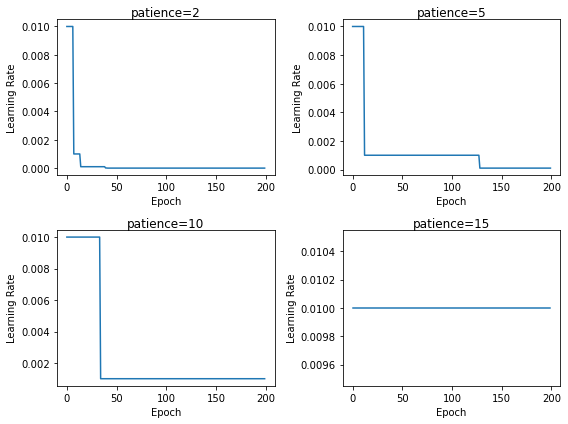

In [42]:
# plot learning rates
line_plots(patiences, lr_list,"Learning Rate")

The first figure shows line plots of the **learning rate over the training epochs** for each of the evaluated patience values. 

We can see that the smallest patience value of two rapidly drops the learning rate to a minimum value within 25 epochs, the largest patience of 15 almost was not affected the learning rate. From these plots, we would expect the patience values of 5 and 10 for
this model on this problem to result in better performance as they allow the larger learning rate
to be used for some time before dropping the rate to refine the weights.

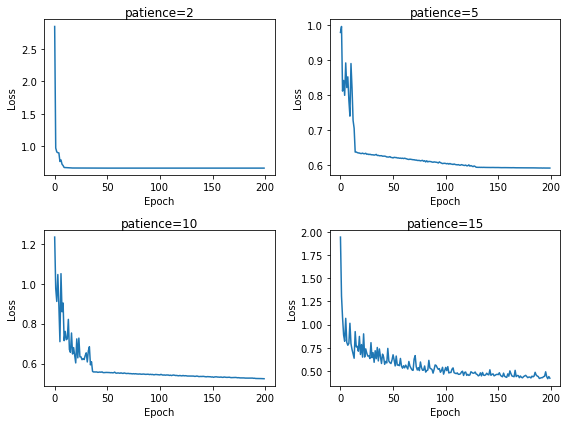

In [43]:
# plot loss
line_plots(patiences, loss_list,"Loss")

The next result shows the **loss on the training dataset for each of the patience values**. The
plot shows that the patience values of 2 and 5 result in a rapid convergence of the model,
perhaps to a sub-optimal loss value. In the case of a patience level of 10 and 15, loss drops
reasonably until the learning rate is dropped below a level that large changes to the loss can be
seen. This occurs halfway for the patience of 10 and nearly the end of the run for patience 15.

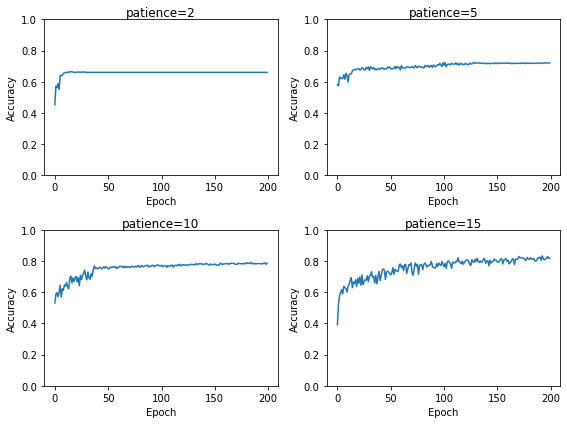

In [44]:
# plot accuracy
line_plots(patiences, acc_list,"Accuracy")

The final figure shows the **training set accuracy over training epochs for each patience
value**. We can see that indeed the small patience values of 2 and 5 epochs results in premature
convergence of the model to a less-than-optimal model at around 65% and less than 75%
accuracy respectively. 

The larger patience values result in better performing models, with the patience of 10 showing convergence just before 150 epochs, whereas the patience 15 continues to show the effects of a volatile accuracy given the nearly completely unchanged learning rate.

These plots show how a learning rate that is decreased a sensible way for the problem and
chosen model configuration can result in both a skillful and converged stable set of final weights, a desirable property in a final model at the end of a training run.



### 5.2.4 Effect of Adaptive Learning Rates



Learning rates and learning rate schedules are both challenging to configure and critical to the performance of a deep learning neural network model. Tensorflow provides a number of different
popular variations of stochastic gradient descent with adaptive learning rates, such as:

- Adaptive Gradient Algorithm (AdaGrad)
- Root Mean Square Propagation (RMSprop)
- Adaptive Moment Estimation (Adam)

Each provides a different methodology for adapting learning rates for each weight in the network. There is no single best algorithm, and the results of racing optimization algorithms (comparing the performance of many methods) on one problem are unlikely to be transferable
to new problems.

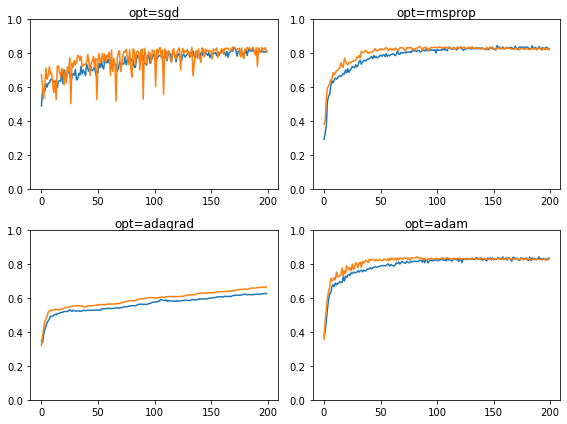

In [45]:
# study of sgd with adaptive learning rates in the blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	train_x, test_x = x[:n_train, :], x[n_train:, :]
	train_y, test_y = y[:n_train], y[n_train:]
	return train_x, train_y, test_x, test_y

# fit a model and plot learning curve
def fit_model(train_x, train_y, test_x, test_y, optimizer):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
	# fit model
	history = model.fit(train_x, train_y,
                     validation_data=(test_x, test_y), epochs=200, verbose=0)
 
	# plot learning curves
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.title('opt='+optimizer, pad=-80)

# prepare dataset
train_x, train_y, test_x, test_y = prepare_data()

# create learning curves for different optimizers
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

# create a figure
fig = plt.figure(figsize=(8, 6))

for i in range(len(optimizers)):
	# determine the plot number
	plot_no = 220 + (i+1)
	fig.add_subplot(plot_no,ylim=(0,1))
	# fit model and plot learning curves for an optimizer
	fit_model(train_x, train_y, test_x, test_y, optimizers[i])
 
# show learning curves
plt.tight_layout()
plt.show()

Again, we can see that SGD with a default learning rate of 0.01 and no momentum does learn the problem but requires nearly all 200 epochs and results in volatile accuracy on the training data and much more so on the test dataset. The plots show that all three adaptive learning rate methods learning the problem faster and with dramatically less volatility in train
and test set accuracy.

Both RMSProp and Adam demonstrate similar performance, effectively learning the problem within 50 training epochs and spending the remaining training time making minor weight updates, but not converging as we saw with the learning rate schedules in the previous section.

# 6 Next

This lesson end for now, but in the **Better Learning Part II** will continue guide you how to improve the learning procedure of a Deep Neural Network. We will see next:

1. How the training process is sensitive to the scale of input and target variables and how
normalization and standardization processes can dramatically improve model convergence.
2. How the vanishing gradient problem can be addressed with the rectified linear activation
function and dramatically improve the likelihood and speed of convergence.
3. How the exploding gradient problem can be addressed with gradient norm scaling and
gradient value clipping.
4. How the speed of convergence can be accelerated through the standardizing of internal
representations with batch normalization.
5. How greedy layer-wise pretraining can facilitate the development of deeper models, a
milestone in the field of deep learning.
6. How transfer learning can be used as a feature extraction and weight initialization scheme
to short-cut the training process.

# References

- [François Chollet - Kaggle, 2021.](https://www.kaggle.com/fchollet/code)
- [François Chollet. Deep Learning with Python, Second Edition, 2021.](https://www.manning.com/books/deep-learning-with-python-second-edition)
- [Jason Brownlee, 2021. Deep Learning Bundle.](https://machinelearningmastery.com/)